In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
euro_team = pd.read_csv("/content/EuroTeam2024.csv")

In [3]:
euro_team.head()

,Unnamed: 0,Age,Height,Goals,MarketValue,Caps
0,0,32,187,0,28000000,40
1,1,38,193,0,4000000,119
2,2,34,187,0,3000000,0
3,3,24,191,0,40000000,12
4,4,28,195,0,30000000,25


In [4]:
euro_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   620 non-null    int64
 1   Age          620 non-null    int64
 2   Height       620 non-null    int64
 3   Goals        620 non-null    int64
 4   MarketValue  620 non-null    int64
 5   Caps         620 non-null    int64
dtypes: int64(6)
memory usage: 29.2 KB


In [5]:
euro_team.shape

(620, 6)

In [6]:
euro_team.isnull().sum()

Unnamed: 0     0
Age            0
Height         0
Goals          0
MarketValue    0
Caps           0
dtype: int64

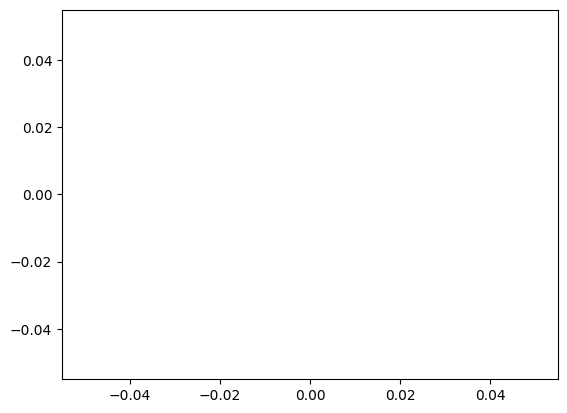

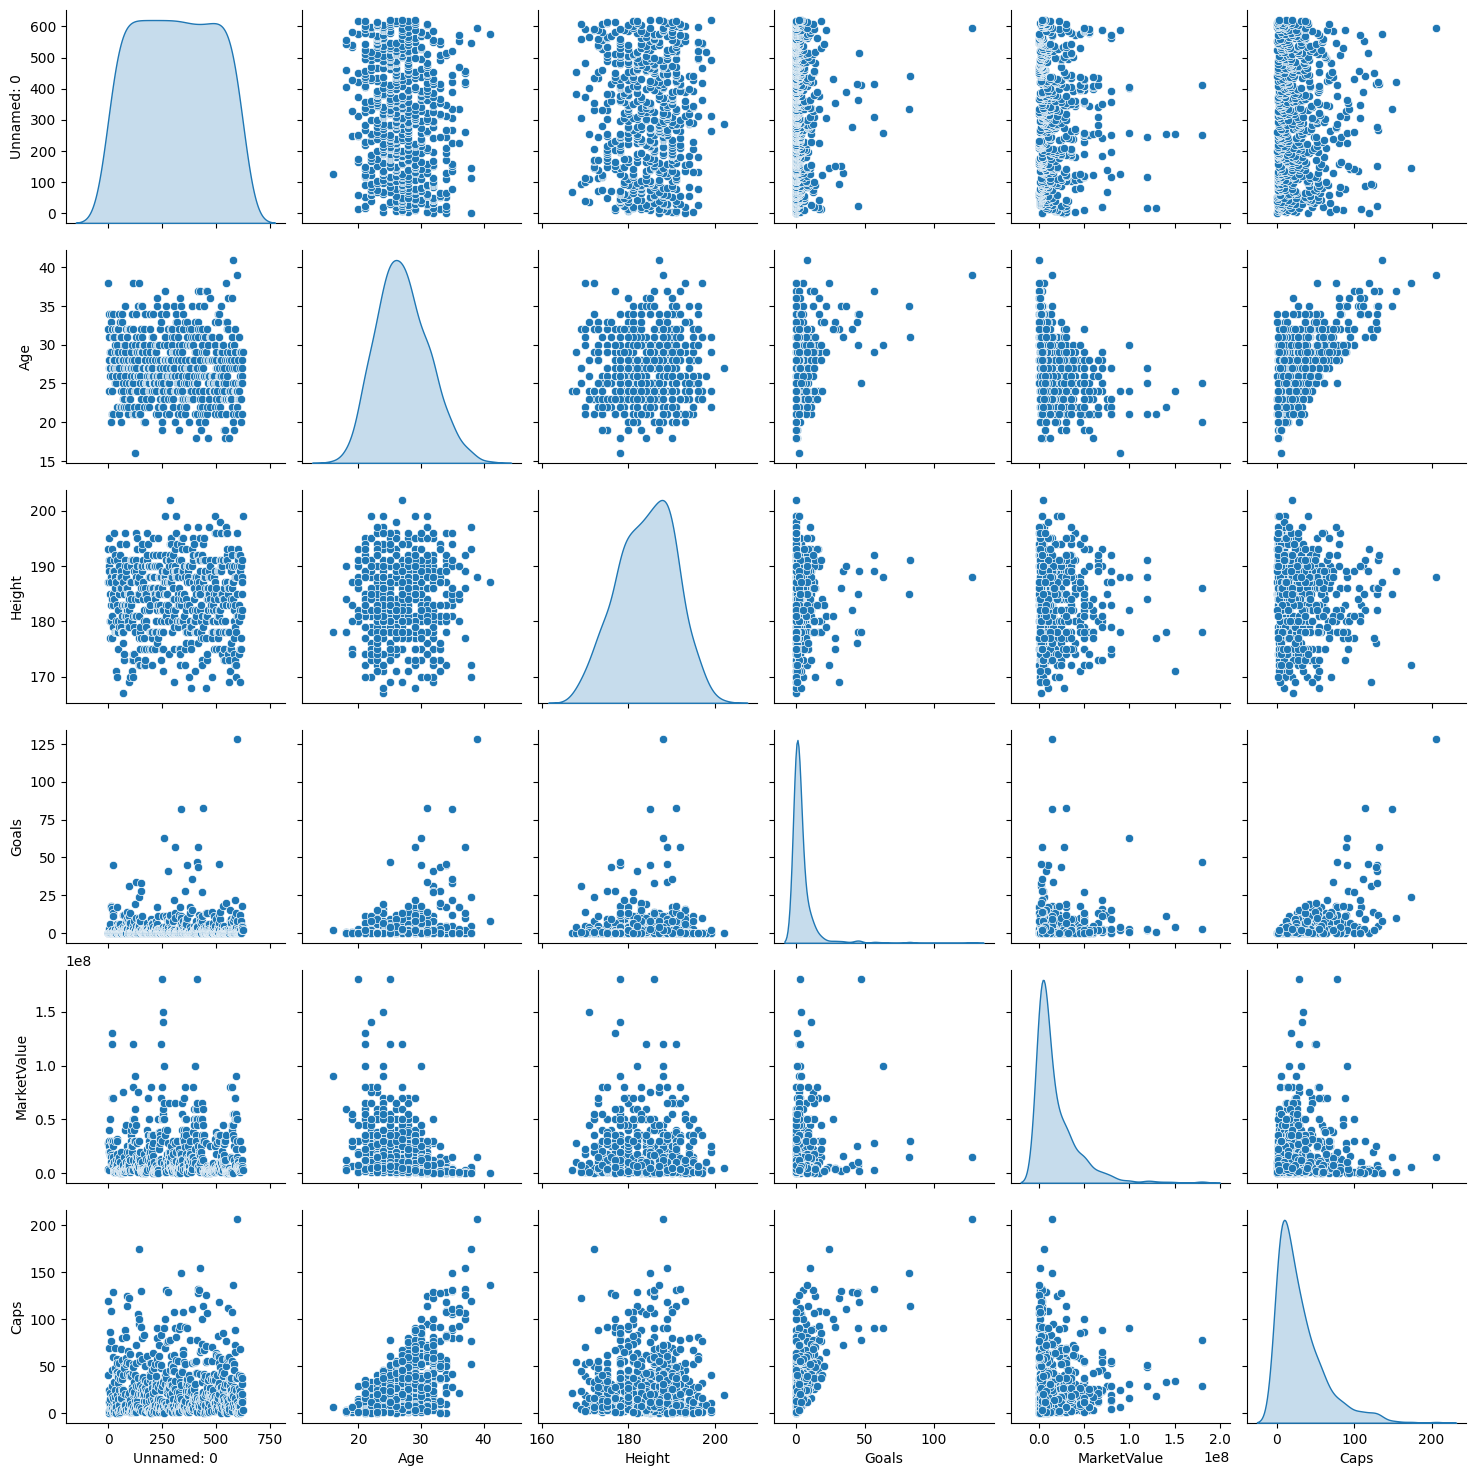

In [7]:
plt.plot(figsize=(16,6))
sns.pairplot(data=euro_team,diag_kind='kde')

Lets test on the goals part for the data

In [51]:
x = euro_team.drop(['Goals'],axis=1)
y = euro_team['Goals']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [53]:
from sklearn.ensemble import RandomForestClassifier
randclass = RandomForestClassifier(n_estimators = 20, random_state = 1)
randclass.fit(X_train,Y_train)
y_pred = randclass.predict(X_test)

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [55]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100)
log.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [57]:
from sklearn import tree
treeclass = tree.DecisionTreeClassifier()
treeclass = treeclass.fit(X_train, Y_train)

In [58]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [59]:
from sklearn.metrics import classification_report
def report(model):
    preds = model.predict(X_test)
    print(classification_report(Y_test,preds))

NB MODEL
              precision    recall  f1-score   support

           0       0.75      0.12      0.21        72
           1       0.33      0.04      0.07        27
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

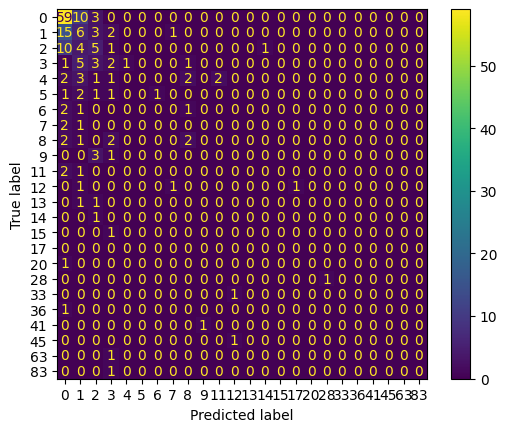

In [60]:
print("NB MODEL")
report(nb)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [61]:
residuals_nb = Y_test - y_pred

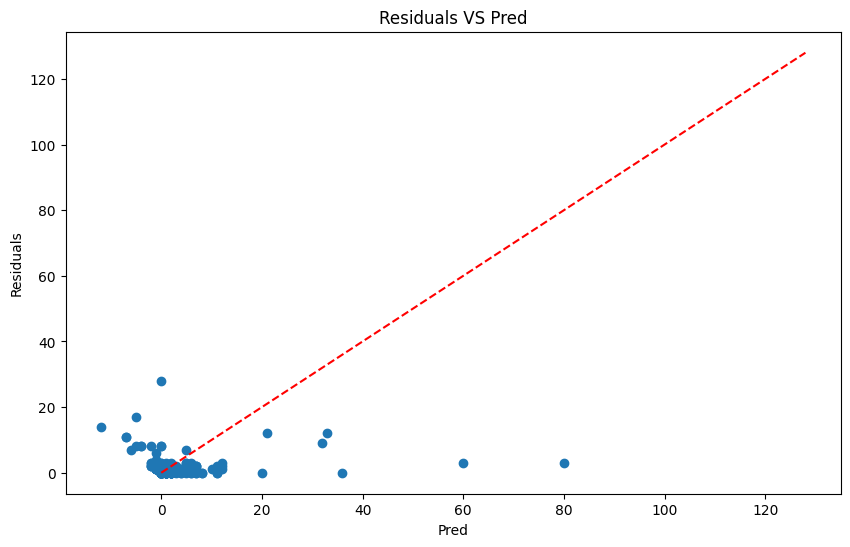

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_nb,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

Logistic Regression
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        72
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


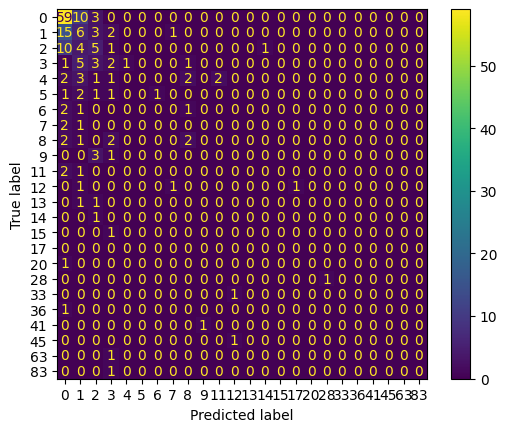

In [63]:
print("Logistic Regression")
report(log)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [64]:
residuals_log = Y_test - y_pred

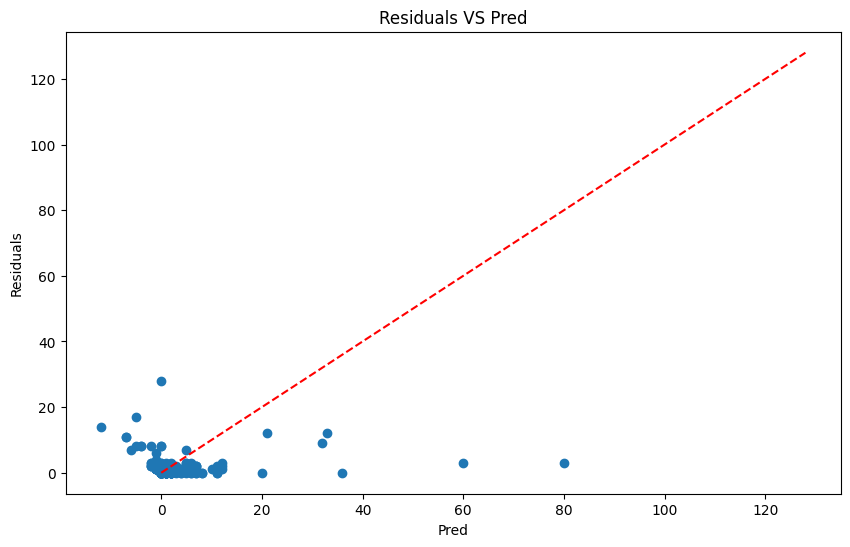

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_log,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.04      1.00      0.07         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          33       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


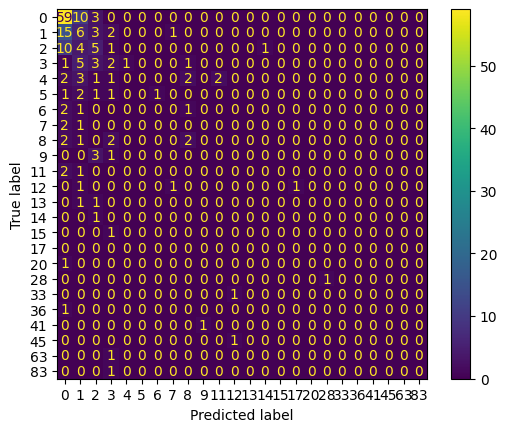

In [66]:
print("SVC")
report(svc)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [67]:
residuals_svc = Y_test - y_pred

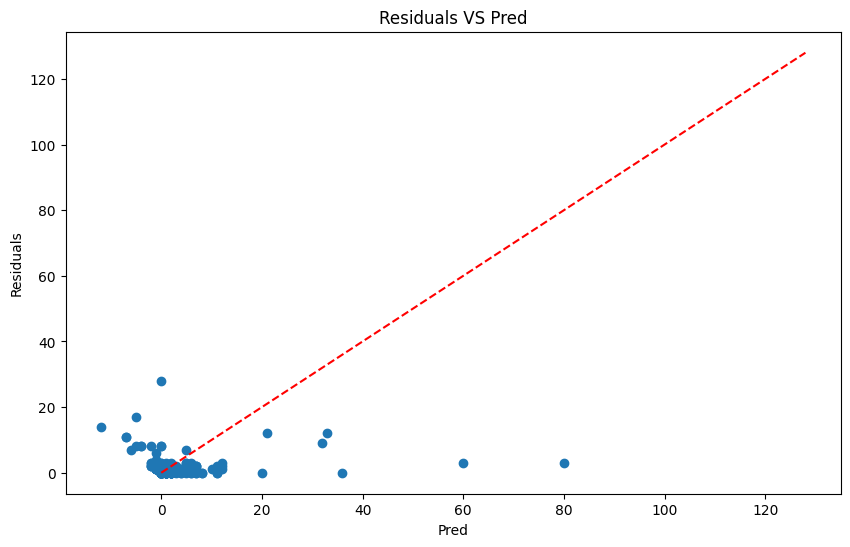

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_svc,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

Random Forest
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        72
           1       0.17      0.22      0.19        27
           2       0.24      0.24      0.24        21
           3       0.15      0.15      0.15        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.33      0.29      0.31         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          28 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

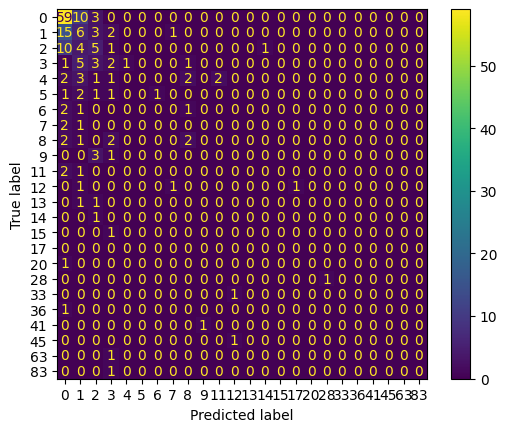

In [69]:
print("Random Forest")
report(randclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [70]:
residuals_rand = Y_test - y_pred

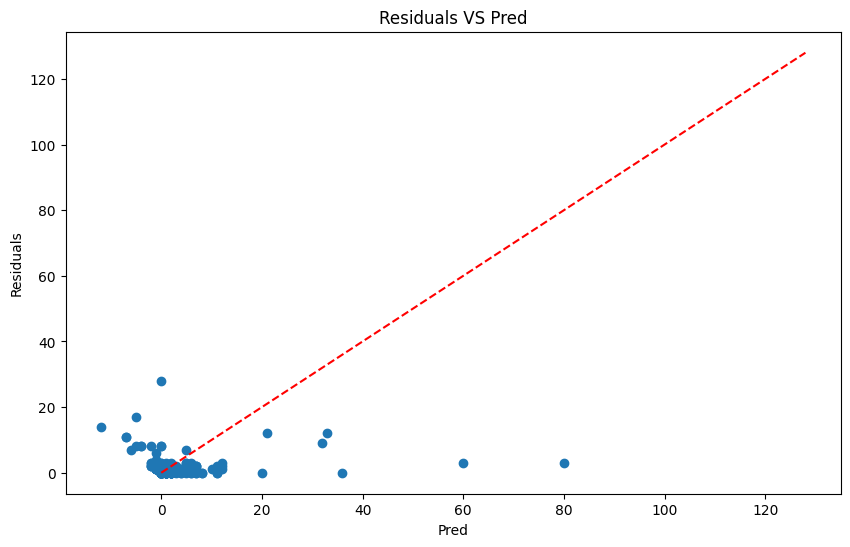

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_rand,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

Decision tree
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        72
           1       0.29      0.44      0.35        27
           2       0.25      0.33      0.29        21
           3       0.12      0.15      0.13        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.17      0.14      0.15         7
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

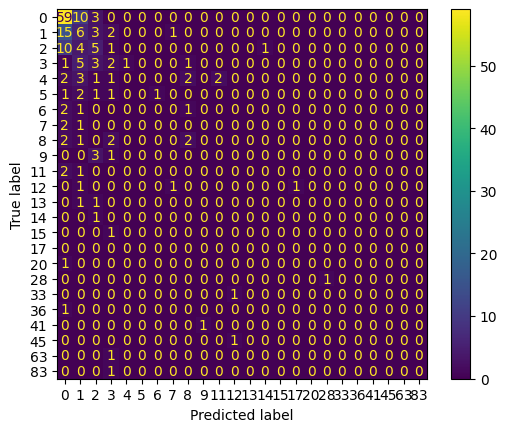

In [73]:
print("Decision tree")
report(treeclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [74]:
residuals_tree = Y_test -y_pred

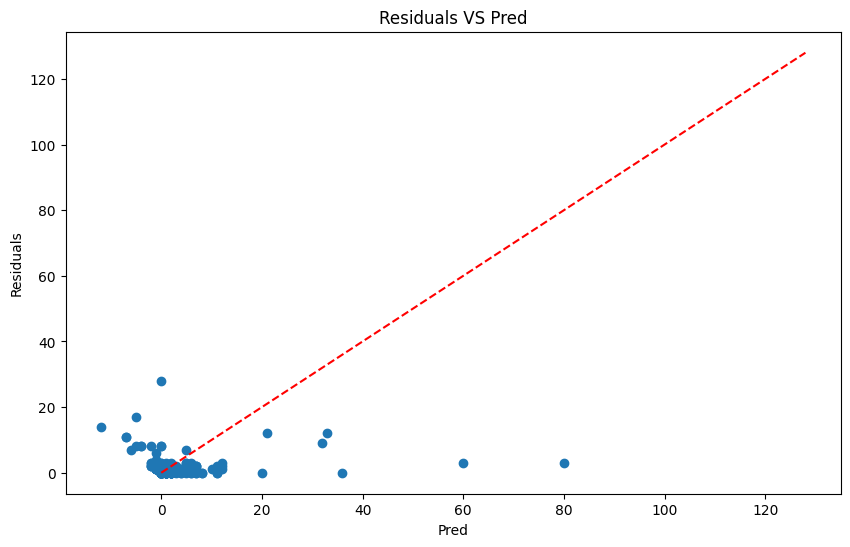

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_tree,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

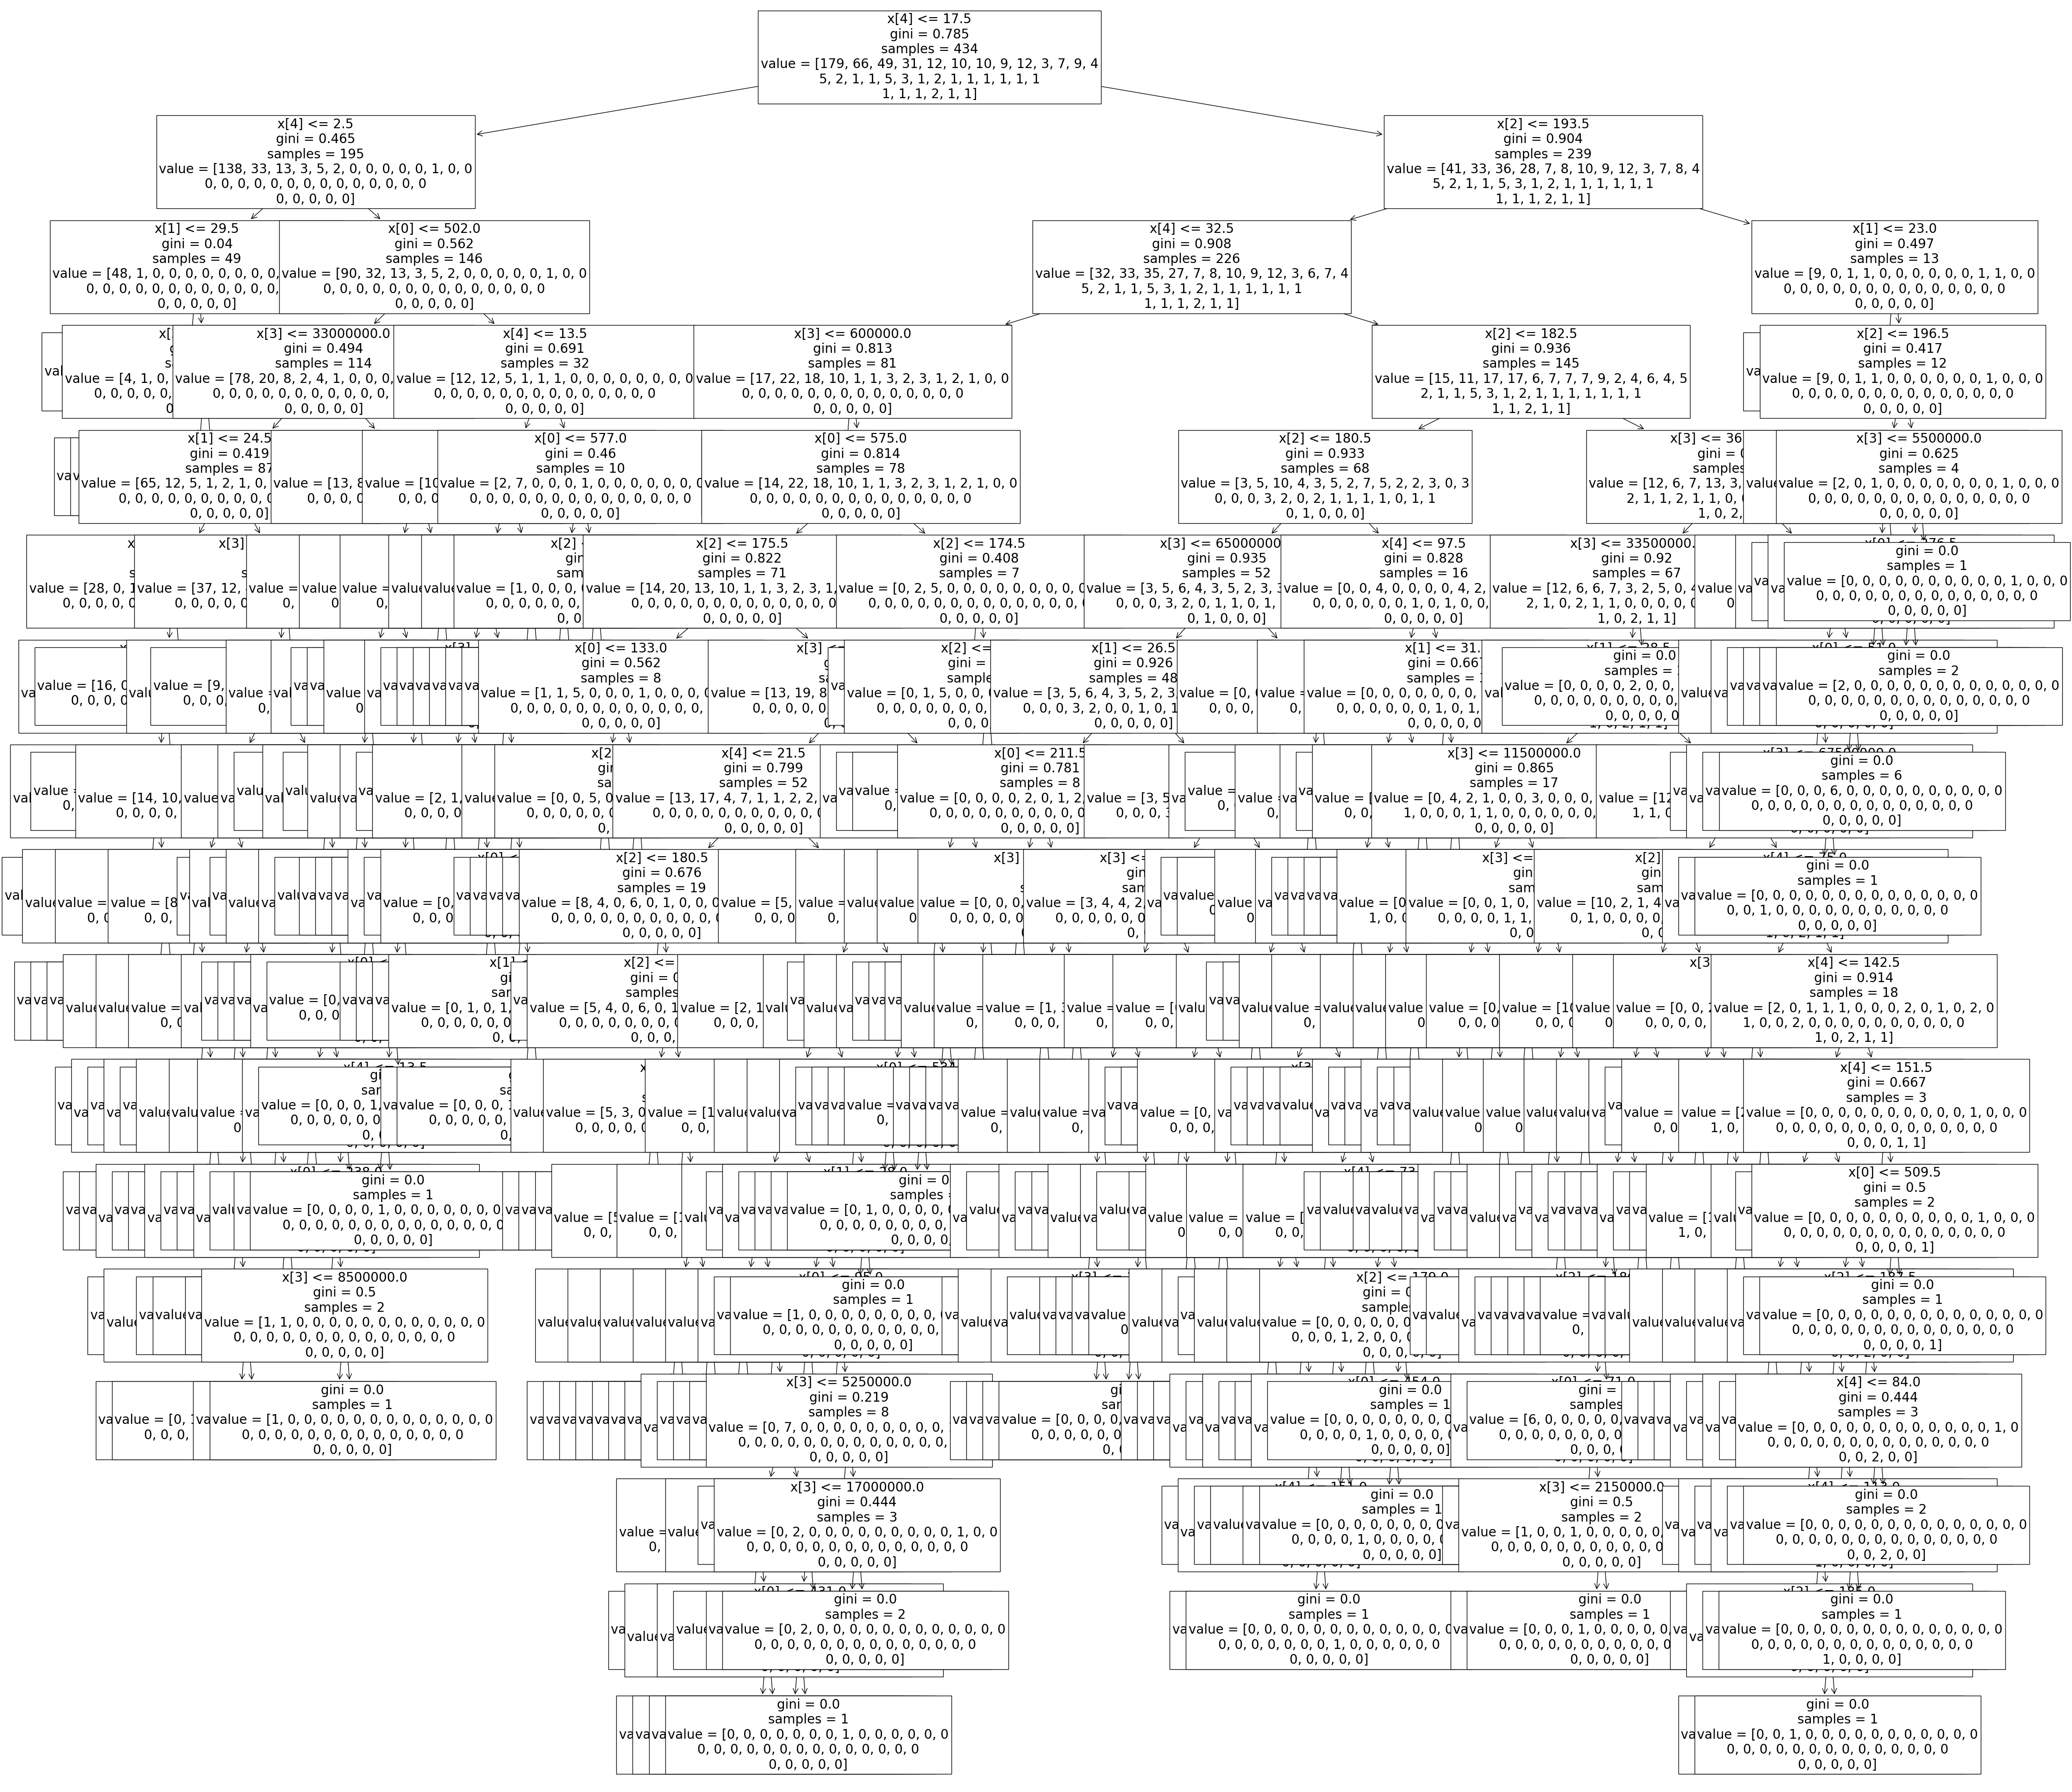

In [76]:
# plot tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(treeclass, fontsize=20)
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [79]:
print("Regresion score is: ",reg.score(X_train,Y_train))

Regresion score is:  0.4280011779665207


In [80]:
print("Regression  Coefficients: ",reg.coef_)

Regression  Coefficients:  [ 2.41339563e-03 -3.36119130e-01  4.73104198e-02  2.01969341e-08
  2.35900326e-01]


In [81]:
print("Regresion intercept : ",reg.intercept_)

Regresion intercept :  -3.9040113306517785


In [82]:
reg_predictions = reg.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
MAE = mean_absolute_error(Y_test,reg_predictions)
MSE = mean_squared_error(Y_test,reg_predictions)
RMSE = np.sqrt(MSE)

In [99]:
print("MAE :" ,MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)



MAE : 3.9436062295712775
MSE:  55.28797521716736
RMSE:  7.435588424406461


Lets get correlation

In [86]:
euro_team.corr()

,Unnamed: 0,Age,Height,Goals,MarketValue,Caps
Unnamed: 0,1.000000,-0.111710,0.014558,0.044337,-0.024493,-0.017011
Age,-0.111710,1.000000,0.083836,0.310656,-0.331937,0.644967
Height,0.014558,0.083836,1.000000,-0.017792,-0.069431,-0.049226
Goals,0.044337,0.310656,-0.017792,1.000000,0.106248,0.636026
MarketValue,-0.024493,-0.331937,-0.069431,0.106248,1.000000,-0.007994
Caps,-0.017011,0.644967,-0.049226,0.636026,-0.007994,1.000000


In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
adaboost=AdaBoostClassifier(n_estimators=100,random_state=0)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

Ada boost
              precision    recall  f1-score   support

           0       0.39      1.00      0.56        72
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          33     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


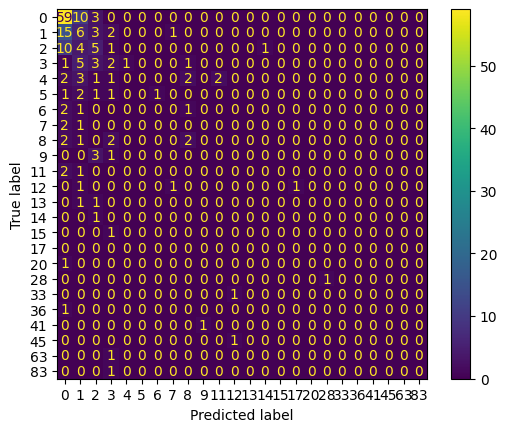

In [89]:
print("Ada boost")
report(adaboost)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [90]:
residuals_ada = Y_test -y_pred

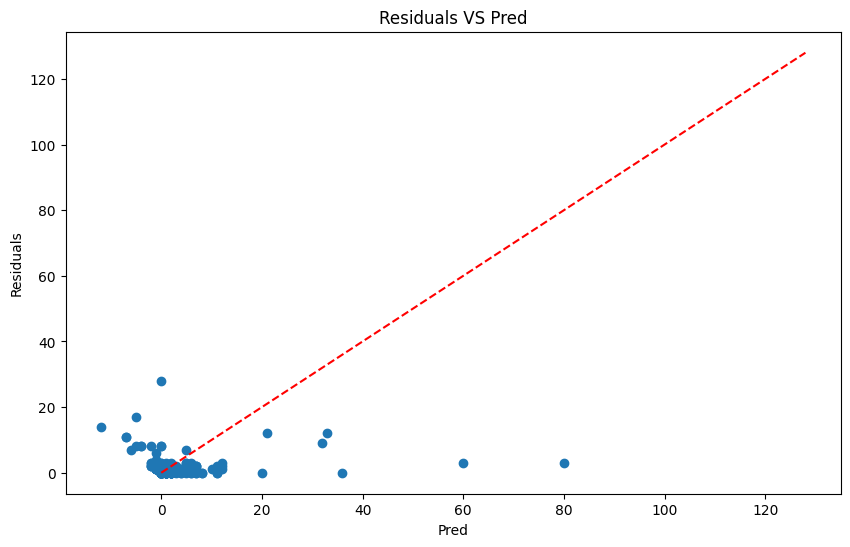

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_ada,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier()
gradboost.fit(X_train,Y_train)

GradientBoostingClassifier()

Gradient  boost
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        72
           1       0.16      0.19      0.17        27
           2       0.18      0.24      0.20        21
           3       0.10      0.08      0.09        13
           4       0.20      0.09      0.13        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.14      0.14      0.14         7
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

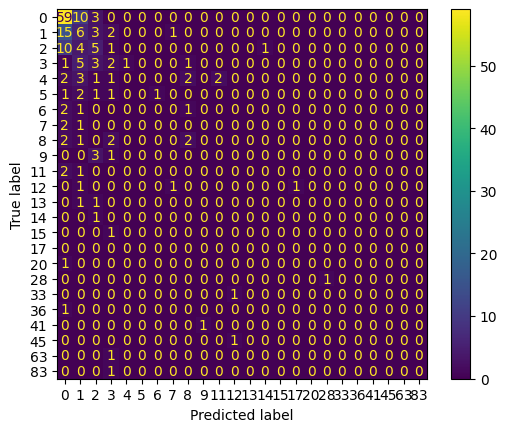

In [93]:
print("Gradient  boost")
report(gradboost)
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
plt.show()

In [94]:
residuals_grad_boost = Y_test - y_pred

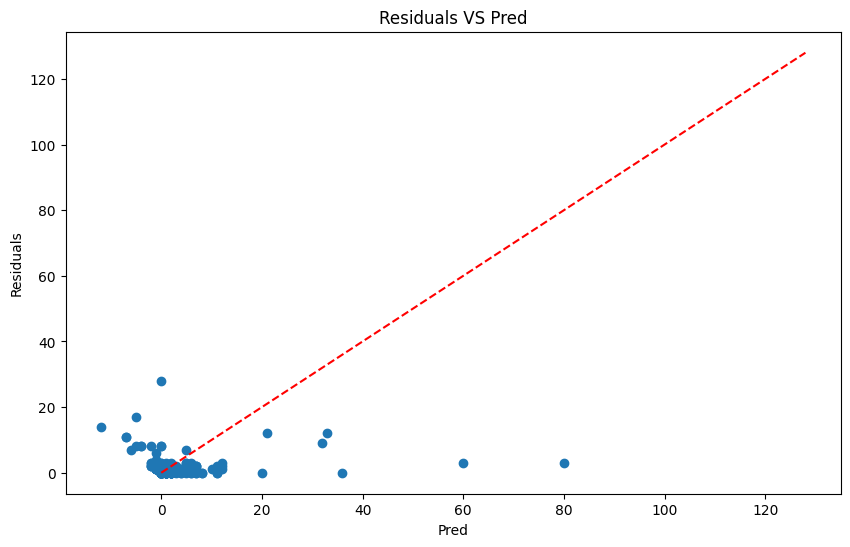

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(residuals_grad_boost,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Residuals VS Pred')
plt.xlabel('Pred')
plt.ylabel('Residuals')
plt.show()

Lets get the presicions and accuracy how is done on algorythms for other model than xgboost
1. NB Nominial as suggest Precision is 0.75 Accuracy is 0.05
2. Logistic regresion  Precision is 0 Accuracy is 0.39
3. SVM Precision is 0 accuracy is 0.04
4. Random Forest Precision is 0.60 Accuracy 0.40
5. Decision tree Precision is 0.73 Accuracy 0.36
6. AdaBoost Precision is 0 Accuracy is 0.39
7. GradBoost Precistion is 0 Accuracy is 0.35

As we can see the dat given the precision only is good on the Nominial model part but the accuracy is to low and on the part of the decision tree the precisio is good Accuracy is we can say as middle compare to other models clasifications.

Residuals for the predicted and tested is good for all the parts

And the liner part are:
1. MAE : 3.9436062295712775
2. MSE:  55.28797521716736
3. RMSE:  7.435588424406461
